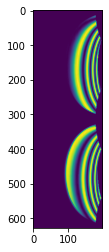

In [18]:
import ect
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tracker import ImageLoader, FilteredTransformation

radius = 200
img_offset = 20
ect_offset = 40

loader = ImageLoader("../sample_imgs/stripes2.jpeg")
transformer = FilteredTransformation(img_offset, ect_offset, radius)

stripes = loader.load()

plt.imshow(stripes)

/usr/lib/python3.10/ect/maps.py:84: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.uint8((y-ylow)*px34 + (yhi-y)*px12)


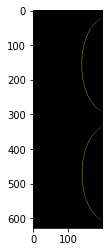

In [19]:
ect_stripes = transformer.transform(stripes)

ect_prep = np.zeros((400, 400), dtype=complex)
ect_prep[:, 220] = -1j
ect_prep[:, 200] = 1
ect_prep[:, 199] = 1
ect_prep[:, 180] = 1j

fft_prep = np.zeros_like(ect_prep)
fft_prep[:, :200] = ect_prep[:, 200:]
fft_prep[:, 200:] = ect_prep[:, :200]

ect_prep = ect.logpolar(ect_prep, radius=radius, offset=ect_offset)
sidelobe = ect.sidelobe(ect_prep.shape[:2], offset=ect_offset)
ect_prep = ect_prep * sidelobe

# ect_stripes = np.zeros_like(ect_stripes)
# # ect_stripes[:, 150] = 1
# ect_stripes[:, 120] = 1
# ect_stripes[:, 100] = 1
# ect_stripes[:, 80] = 1


plt.imshow(ect.complex_to_hsv(ect_prep))


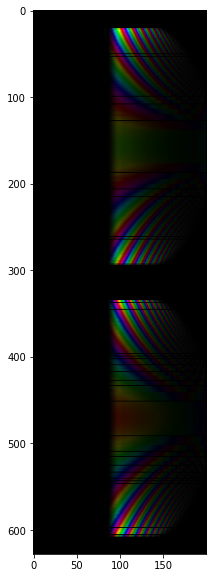

In [20]:
inv_test = transformer.invert(ect_prep)

plt.figure(figsize=(10, 10))
plt.imshow(ect.complex_to_hsv(inv_test))

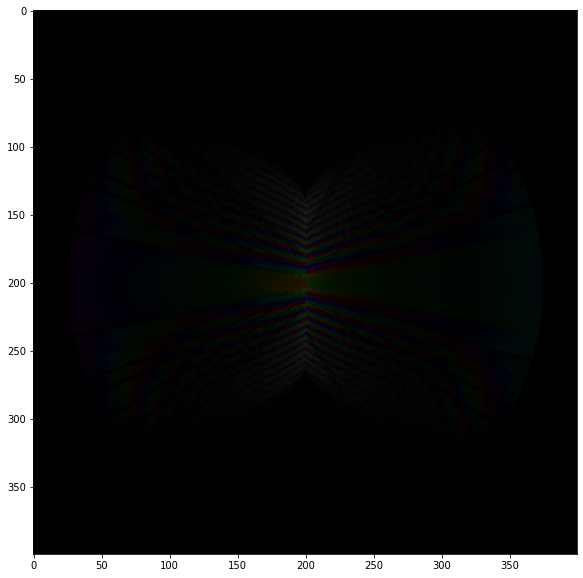

In [21]:
inv = ect.ilogpolar(
    ect.complex_to_hsv(inv_test),
    radius=radius,
    offset=img_offset
)

plt.figure(figsize=(10, 10))
plt.imshow(inv)

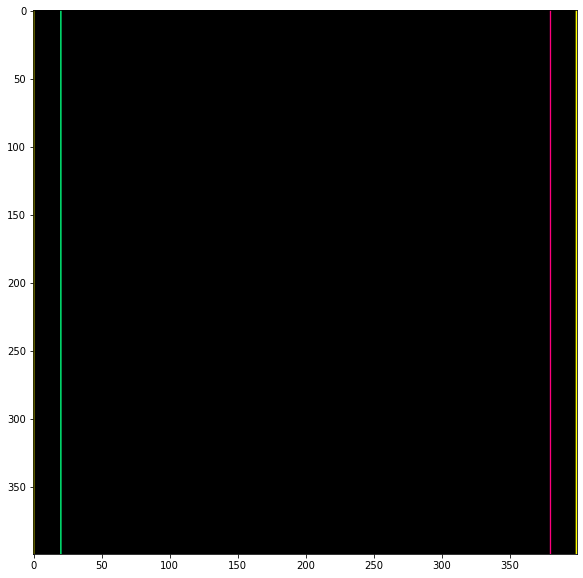

In [22]:
plt.figure(figsize=(10, 10))
plt.imshow(ect.complex_to_hsv(fft_prep))

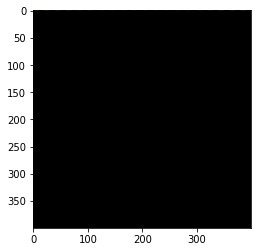

In [23]:
ifft_stripes = np.fft.ifft2(fft_prep)

plt.imshow(ect.complex_to_hsv(ifft_stripes))